In [53]:
#문제 1 : 데이터 파일 읽어오기
import pandas as pd
df = pd.read_csv('example_data.csv')
print(df)

    학번    이름   학년   점수 분반  공부시간
0    1  신사임당  NaN   69  B     4
1    2   홍길동  1.0   92  B     3
2    3   강감찬  4.0   91  C    20
3    4   강감찬  2.0   70  C     5
4    5   강감찬  3.0   83  C     5
5    6   이순신  4.0   95  A     0
6    7   강감찬  4.0   71  C     1
7    8   김유신  NaN   88  B     5
8    9  신사임당  3.0   94  A     9
9   10   홍길동  NaN   60  B     3
10  11   NaN  1.0  200  C     0
11  12  신사임당  2.0   96  A    20
12  13   김유신  4.0   65  A     0
13  14   NaN  2.0   98  C     1
14  15   홍길동  4.0   77  A     2
15  16   이순신  4.0   75  A     4
16  17   NaN  3.0   64  A     2
17  18   홍길동  4.0   91  A     0
18  19   이순신  1.0  200  A     3
19  20  신사임당  2.0   61  A     2
20  20  신사임당  2.0   61  A     2


In [54]:
#문제 2 : 데이터 프레임의정보 요약
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      21 non-null     int64  
 1   이름      18 non-null     object 
 2   학년      18 non-null     float64
 3   점수      21 non-null     int64  
 4   분반      21 non-null     object 
 5   공부시간    21 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ KB
None


In [55]:
#문제 3 기초 통계량 출력
print(df.describe())

              학번         학년          점수       공부시간
count  21.000000  18.000000   21.000000  21.000000
mean   10.952381   2.777778   90.523810   4.333333
std     6.127611   1.165966   38.647922   5.650959
min     1.000000   1.000000   60.000000   0.000000
25%     6.000000   2.000000   69.000000   1.000000
50%    11.000000   3.000000   83.000000   3.000000
75%    16.000000   4.000000   94.000000   5.000000
max    20.000000   4.000000  200.000000  20.000000


In [56]:
#문제 4 : 결측치 확인하기
print(pd.isna(df).sum())

학번      0
이름      3
학년      3
점수      0
분반      0
공부시간    0
dtype: int64


In [57]:
#문제 5: 이상치 확인하기
outlier_df =df[(df['점수']>100) | (df['공부시간']>10)]
print("이상치 계수", len(outlier_df))
print(outlier_df)

이상치 계수 4
    학번    이름   학년   점수 분반  공부시간
2    3   강감찬  4.0   91  C    20
10  11   NaN  1.0  200  C     0
11  12  신사임당  2.0   96  A    20
18  19   이순신  1.0  200  A     3


In [58]:
#문제 6 :중복된 행  있는지 찾기
print("중복 제거 전 데이터프레임 크기:",df.shape)
arr = df[df.duplicated(keep=False)]
print("완전 중복 행 개수:",len(arr))
print(arr)

중복 제거 전 데이터프레임 크기: (21, 6)
완전 중복 행 개수: 2
    학번    이름   학년  점수 분반  공부시간
19  20  신사임당  2.0  61  A     2
20  20  신사임당  2.0  61  A     2


In [59]:
#중복 데이터 삭제하기
df2 = df.drop_duplicates()
print('중복 제거 후 데이터프레임 크기:', df2.shape)
print('제거된 행 수:', len(df)-len(df2))
print(df2)

중복 제거 후 데이터프레임 크기: (20, 6)
제거된 행 수: 1
    학번    이름   학년   점수 분반  공부시간
0    1  신사임당  NaN   69  B     4
1    2   홍길동  1.0   92  B     3
2    3   강감찬  4.0   91  C    20
3    4   강감찬  2.0   70  C     5
4    5   강감찬  3.0   83  C     5
5    6   이순신  4.0   95  A     0
6    7   강감찬  4.0   71  C     1
7    8   김유신  NaN   88  B     5
8    9  신사임당  3.0   94  A     9
9   10   홍길동  NaN   60  B     3
10  11   NaN  1.0  200  C     0
11  12  신사임당  2.0   96  A    20
12  13   김유신  4.0   65  A     0
13  14   NaN  2.0   98  C     1
14  15   홍길동  4.0   77  A     2
15  16   이순신  4.0   75  A     4
16  17   NaN  3.0   64  A     2
17  18   홍길동  4.0   91  A     0
18  19   이순신  1.0  200  A     3
19  20  신사임당  2.0   61  A     2


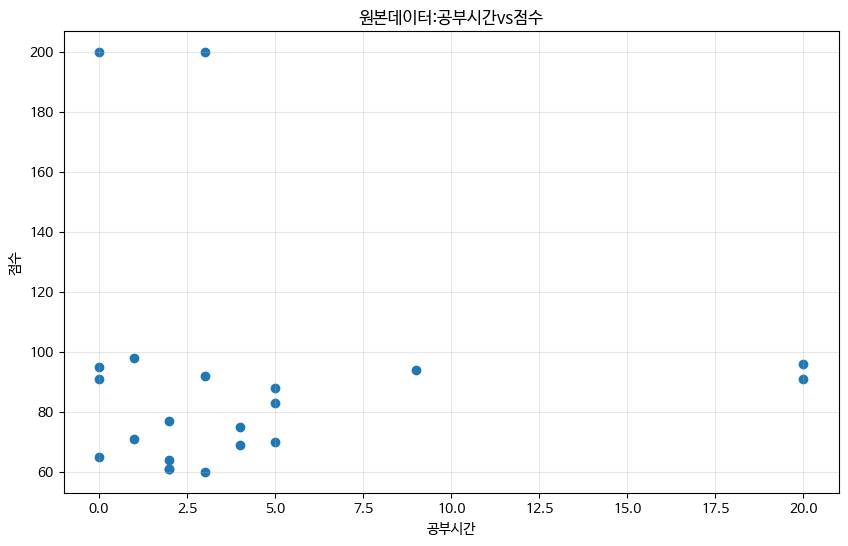

In [60]:
#문제 9 : 시각화
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
plt.figure(figsize=(10,6))
plt.scatter(df['공부시간'],df['점수'])
plt.grid(True,linestyle='-', alpha=0.3)
plt.title('원본데이터:공부시간vs점수')
plt.xlabel('공부시간')
plt.ylabel('점수')
plt.show()

In [77]:
#이상치 실습문제
data = pd.Series([10, 11, 12, 13, 14, 15, 100, 101])
Q1 = data.quantile(0.25)
Q2 = data.quantile(0.5)
Q3 = data.quantile(0.75)
IQR =Q3-Q1
print('하위 25% 위치의 값 Q1:', Q1)
print('데이터의 중앙값(50% 위치) Q2:', Q2)
print('데이터의 상위 25% 위치의 값(하위 75% 위치) Q3:', Q3)
print('사분위수 범위(IQR):',IQR)
print('하한 경계(Lower Bound):', Q1 - 1.5 * IQR)
print('상한 경계(Upper Bound):', Q3 + 1.5 * IQR)

하위 25% 위치의 값 Q1: 11.75
데이터의 중앙값(50% 위치) Q2: 13.5
데이터의 상위 25% 위치의 값(하위 75% 위치) Q3: 36.25
사분위수 범위(IQR): 24.5
하한 경계(Lower Bound): -25.0
상한 경계(Upper Bound): 73.0


In [79]:
#문제 10 이상치 데이터 탐색 및 제거
Q1_score = df['점수'].quantile(0.25)
Q3_score = df['점수'].quantile(0.75)
IQR_score = Q3_score - Q1_score

In [80]:
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

In [85]:
score_outliers = df[(df['점수'] < lower_bound_score) | (df['점수'] > upper_bound_score)]
print('점수 이상치:')
print(score_outliers)

점수 이상치:
    학번   이름   학년   점수 분반  공부시간
10  11  NaN  1.0  200  C     0
18  19  이순신  1.0  200  A     3


In [86]:
Q1_study = df['공부시간'].quantile(0.25)
Q3_study = df['공부시간'].quantile(0.75)
IQR_study = Q3_study - Q1_study

In [87]:
lower_bound_study = Q1_study - 1.5 * IQR_study
upper_bound_study = Q3_study + 1.5 * IQR_study

In [88]:
study_outliers = df[(df['공부시간'] < lower_bound_study) | (df['공부시간'] > upper_bound_study)]
print('공부시간 이상치:')
print(study_outliers)

공부시간 이상치:
    학번    이름   학년  점수 분반  공부시간
2    3   강감찬  4.0  91  C    20
11  12  신사임당  2.0  96  A    20


In [89]:
df_no_outliers = df[(df['점수'] >= lower_bound_score) & (df['점수'] <= upper_bound_score) & (df['공부시간'] >= lower_bound_study) & (df['공부시간'] <= upper_bound_study)]

In [90]:
df_no_outliers = df_no_outliers.reset_index()
print('이상치가 제거된 데이터 프레임:')
print(df_no_outliers)

이상치가 제거된 데이터 프레임:
    index  학번    이름   학년  점수 분반  공부시간
0       0   1  신사임당  NaN  69  B     4
1       1   2   홍길동  1.0  92  B     3
2       3   4   강감찬  2.0  70  C     5
3       4   5   강감찬  3.0  83  C     5
4       5   6   이순신  4.0  95  A     0
5       6   7   강감찬  4.0  71  C     1
6       7   8   김유신  NaN  88  B     5
7       8   9  신사임당  3.0  94  A     9
8       9  10   홍길동  NaN  60  B     3
9      12  13   김유신  4.0  65  A     0
10     13  14   NaN  2.0  98  C     1
11     14  15   홍길동  4.0  77  A     2
12     15  16   이순신  4.0  75  A     4
13     16  17   NaN  3.0  64  A     2
14     17  18   홍길동  4.0  91  A     0
15     19  20  신사임당  2.0  61  A     2
16     20  20  신사임당  2.0  61  A     2


In [93]:
# 11 분반별 점수 평균 계산(기본 방법)
print("문제11. 분반별 점수 평균")
class_mean = df_no_outliers.groupby('분반')['점수'].mean()
print(class_mean.round(2))

문제11. 분반별 점수 평균
분반
A    75.89
B    77.25
C    80.50
Name: 점수, dtype: float64


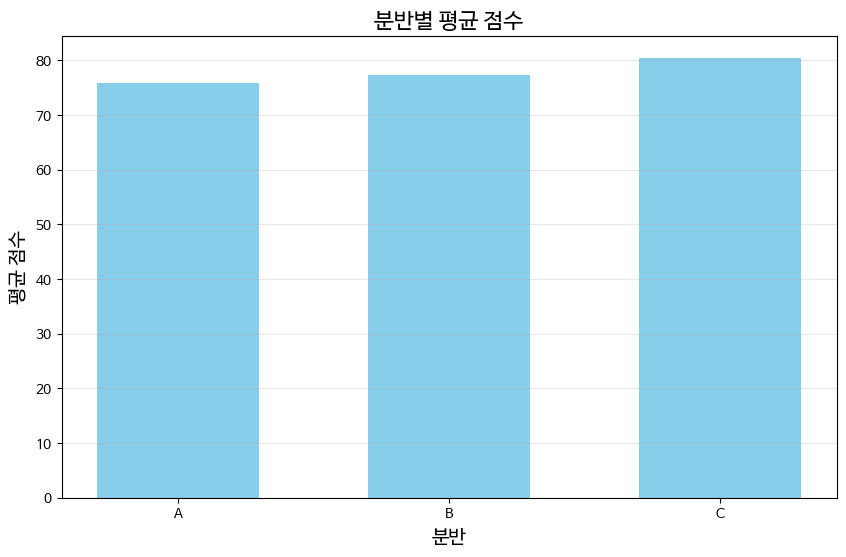

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.rc('font',family='NanumBarunGothic')
plt.bar(class_mean.index, class_mean.values, color='skyblue', width=0.6)
plt.title('분반별 평균 점수', fontsize=16)
plt.xlabel('분반', fontsize=14)
plt.ylabel('평균 점수', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.show()

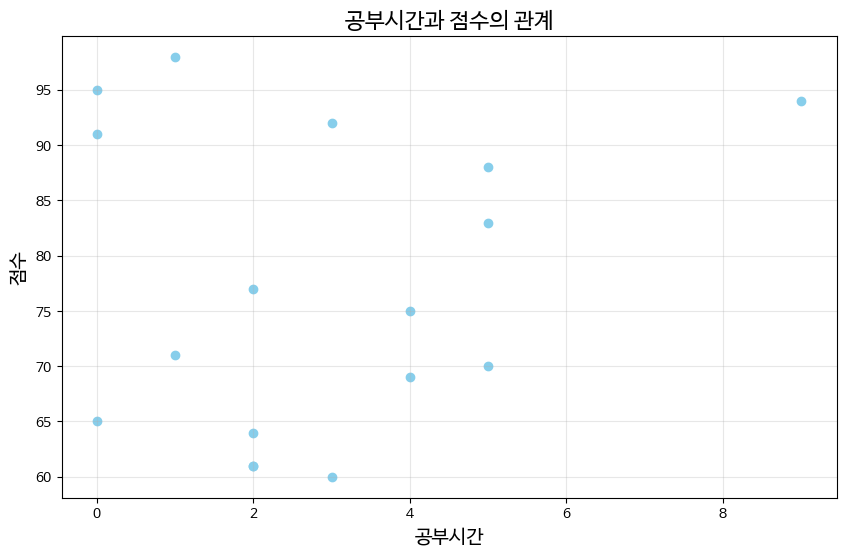

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.rc('font',family='NanumBarunGothic')
plt.scatter(df_no_outliers['공부시간'], df_no_outliers['점수'], color='skyblue')
plt.title('공부시간과 점수의 관계', fontsize=16)
plt.xlabel('공부시간', fontsize=14)
plt.ylabel('점수', fontsize=14)
plt.grid(alpha=0.3)
plt.show()